# Réseaux de Neurones Convolutifs pour la Classification d'Images

In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 58s 5us/step


## Visualisation des Données Images

In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image.shape

(28, 28)

In [ ]:
single_image  #valeur brute de l'image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

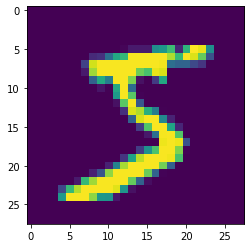

In [8]:
plt.imshow(single_image)

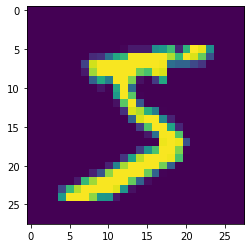

In [ ]:
plt.imshow(single_image)  #MNIST est en niveau de gris ie les valeurs des pixels vont de 0 à 255, mais c'est le color mapping qui l'affiche en couleur

##Pré-traitement des données

Nous devons d'abord nous assurer que les labels (étiquettes) seront compréhensibles par notre CNN.

### Labels

In [9]:
y_train   #les valeurs représente les catégories

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Hmmm, on dirait que nos labels sont littéralement des catégories de chiffres. Nous devons traduire cela par un encodage "one hot" pour que notre CNN puisse comprendre, sinon il pensera qu'il s'agit d'une sorte de problème de régression sur un axe continu. Heureusement, Keras dispose d'une fonction facile à utiliser pour cela :

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [13]:
y_example = to_categorical(y_train)

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
y_example.shape

(60000, 10)

In [16]:
y_example[0]    #premier elt appartient à la classe du chiffre 5, conversion du chiffre sur 10 colonnes

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_cat_test = to_categorical(y_test,10)  #on peut ne pas mettre le 10, car to_categorical peut determiner le nombre de classe directement

In [19]:
y_cat_train = to_categorical(y_train,10)

### Traitement des données X

Nous devrions normaliser les données X

In [20]:
single_image.max()

255

In [21]:
single_image.min()

0

In [22]:
x_train = x_train/255   #normalisation des images en divisant par 255, on pouvait utiliser MinMaxScaler
x_test = x_test/255

In [23]:
scaled_single = x_train[0]

In [24]:
scaled_single.max()

1.0

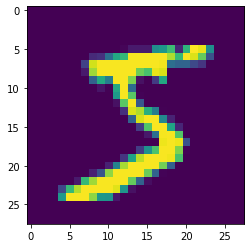

In [25]:
plt.imshow(scaled_single)

### Remodeler les Données

Actuellement, nos données sont composées de 60 000 images stockées dans une matrice de 28 x 28 pixels. 

C'est correct pour un CNN, mais nous devons ajouter une dimension supplémentaire pour montrer que nous avons affaire à un canal RGB (puisque techniquement les images sont en noir et blanc, ne montrant que des valeurs de 0 à 255 sur un seul canal), une image en couleur aurait 3 dimensions.

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
x_test.shape

(10000, 28, 28)

Remodeler pour inclure la dimension du canal (dans ce cas, 1 canal)

In [28]:
x_train = x_train.reshape(60000, 28, 28, 1)  #(batch_size(taille du lot ie nombre d'image), width, heigh, color_channel)

In [32]:
x_train.shape

(60000, 28, 28, 1)

In [33]:
x_test = x_test.reshape(10000,28,28,1)

In [34]:
x_test.shape

(10000, 28, 28, 1)

## Création du Modèle

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten # Flatten : convertie l'image en un vecteur unidemensionnel 

In [37]:
model = Sequential()

# Couche convolutive: filters=2**n(32 classique) si plusieurs classes à augmenter, taille du noyau ((2,2), (4,4), stride=(1,1), deplacement 1 pas sur x et 1 pas sur y), iinput_shape: forme image
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# Couche de Pooling
model.add(MaxPool2D(pool_size=(2, 2)))

# Images aplaties de 28 par 28 à 784 avant la couche finale
model.add(Flatten())

# 128 neurones dans une couche cachée Dense (vous pouvez changer ce nombre de neurones)
model.add(Dense(128, activation='relu'))

# La dernière couche est le calssificateur, donc 10 classes possibles, softmax si multiclass
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # nous pouvons ajouter des metrics supplémentaires https://keras.io/metrics/

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [42]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1421 - accuracy: 0.9573 - val_loss: 0.0551 - val_accuracy: 0.9823
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0485 - accuracy: 0.9847 - val_loss: 0.0388 - val_accuracy: 0.9865
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0313 - accuracy: 0.9902 - val_loss: 0.0328 - val_accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.0463 - val_accuracy: 0.9855


In [44]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.142076,0.957300,0.055088,0.9823
1,0.048530,0.984750,0.038752,0.9865
2,0.031287,0.990200,0.032753,0.9879
3,0.020689,0.993367,0.046275,0.9855


<AxesSubplot:>

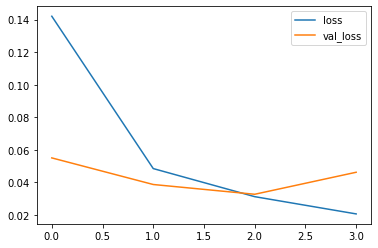

In [47]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

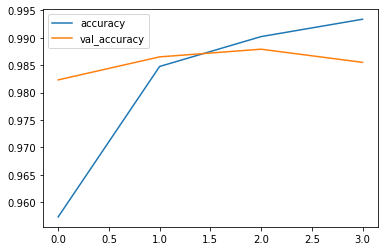

In [48]:
metrics[['accuracy', 'val_accuracy']].plot()

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

### Entraînement du Modèle

In [ ]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1378 - accuracy: 0.9578 - val_loss: 0.0521 - val_accuracy: 0.9816
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0472 - accuracy: 0.9854 - val_loss: 0.0448 - val_accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0372 - val_accuracy: 0.9864
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.0437 - val_accuracy: 0.9860
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0405 - val_accuracy: 0.9870


## Évaluation du Modèle

In [50]:
model.metrics_names

['loss', 'accuracy']

In [51]:
losses = pd.DataFrame(model.history.history)

In [52]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.142076,0.957300,0.055088,0.9823
1,0.048530,0.984750,0.038752,0.9865
2,0.031287,0.990200,0.032753,0.9879
3,0.020689,0.993367,0.046275,0.9855


<AxesSubplot:>

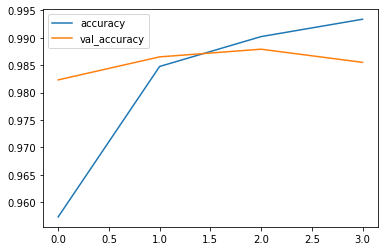

In [53]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

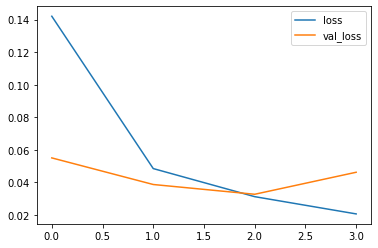

In [54]:
losses[['loss','val_loss']].plot()

In [55]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.046274613589048386, 0.9854999780654907]


In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
model.predict(x_test)[0]

array([2.3468436e-09, 7.7556739e-11, 1.6293440e-07, 7.8149083e-07,
       4.6723610e-12, 8.2711921e-11, 9.8430438e-15, 9.9999893e-01,
       1.9709778e-09, 9.7124584e-08], dtype=float32)

In [60]:
predictions = np.argmax(model.predict(x_test), axis=1)

In [64]:
predictions[0]

7

In [65]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.98      1032
           3       0.97      0.99      0.98      1010
           4       1.00      0.97      0.98       982
           5       1.00      0.96      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [70]:
confusion_matrix(y_test,predictions)

array([[ 977,    0,    0,    1,    0,    0,    0,    0,    2,    0],
       [   0, 1133,    1,    1,    0,    0,    0,    0,    0,    0],
       [   2,    0, 1021,    6,    0,    0,    0,    1,    2,    0],
       [   0,    0,    1, 1004,    0,    1,    0,    0,    4,    0],
       [   1,    2,    6,    0,  951,    0,    3,    1,    4,   14],
       [   2,    0,    1,   18,    0,  860,    2,    0,    9,    0],
       [   9,    4,    0,    0,    1,    1,  936,    0,    7,    0],
       [   0,    0,    9,    0,    0,    0,    0, 1015,    1,    3],
       [   2,    0,    3,    1,    0,    0,    0,    1,  963,    4],
       [   2,    0,    0,    3,    0,    2,    0,    4,    3,  995]],
      dtype=int64)

In [71]:
import seaborn as sns

<AxesSubplot:>

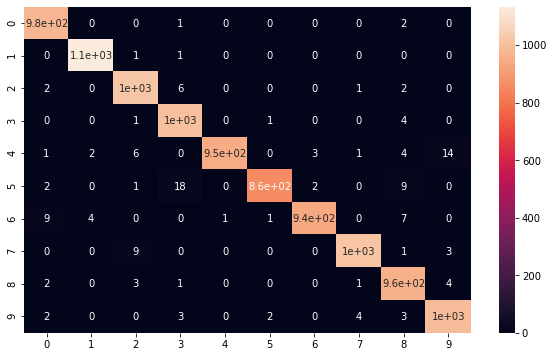

In [72]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

### Prédiction d'une image donnée

In [73]:
my_number = x_test[0]

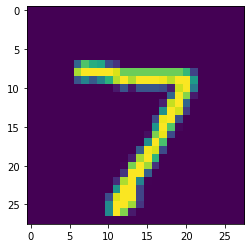

In [75]:
plt.imshow(my_number.reshape(28,28))

In [76]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=-1)

array([7], dtype=int64)

On dirait que le CNN a bien fonctionné ! :)